  ## Homework 10

  ### Your task now is to construct a neural network (in Keras) that learns clasification on this data set. Try to optimize and regularize it with the methods you have learned in class and by going thrugh this notebook. What is the best validation dataset score you can achieve?

  Here's what you should take away from this example:

  - If you are trying to classify data points between N classes, your network should end with a Dense layer of size N.
  - In a single-label, multi-class classification problem, your network should end with a softmax activation, so that it will output a probability distribution over the N output classes.
  - Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network, and the true distribution of the targets.
  - There are two ways to handle labels in multi-class classification: Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using categorical_crossentropy as your loss function. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.
  - If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having intermediate layers that are too small.

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
from keras import layers, models, optimizers, regularizers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical



Using TensorFlow backend.


In [2]:

train, test = reuters.load_data(num_words=10000)
train_data, train_labels = train
test_data, test_labels = test



In [3]:
print(len(train_data), len(train_labels))



8982 8982


In [4]:
print(len(test_data), len(test_labels))



2246 2246


In [5]:
train_data[1]



[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)
                           for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])



In [7]:
decoded_newswire



'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels



array([ 3,  4,  3, ..., 25,  3, 25])

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape



((8982, 10000), (2246, 10000))

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


  ## The homework part

In [11]:
# Prep


def model_compile(model):
    global optimizer
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


def model_fit(model):
    global x_train, x_test, one_hot_train_labels, num_epochs
    model_history = model.fit(
        x_train,
        one_hot_train_labels,
        validation_data=(x_test, one_hot_test_labels),
        epochs=num_epochs,
        batch_size=512,
        verbose=1
    )
    return model_history


def model_evaluate(model):
    global x_test, one_hot_test_labels
    model_score = model.evaluate(
        x_test,
        one_hot_test_labels,
        verbose=1
    )
    return model_score


def print_score(model_score, idx=None, title=None):
    if idx is not None:
        print("Model", idx)
    if title is not None:
        print(title)
    print("Accuracy: %.2f%%" % (model_score[1]*100))
    print("Test loss:", model_score[0])
    print("Test accuracy", model_score[1])



In [12]:
last_layer_size = len(list(set(train_labels)))
last_layer_size



46

In [13]:
input_size = len(x_train[0])
first_layer_size = 500
input_size, first_layer_size


(10000, 500)

In [17]:
model_1 = models.Sequential()
model_1.add(layers.Dense(
    first_layer_size,
    activation='relu',
    input_shape=(input_size,)
))
model_1.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))


optimizer = optimizers.RMSprop(
    lr=0.001,
    rho=0.9,
    epsilon=None,
    decay=0.0
)



In [18]:
model_compile(model_1)
num_epochs = 10
model_1_history = model_fit(model_1)
model_1_score = model_evaluate(model_1)



Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 5s 561us/step - loss: 1.6655 - acc: 0.6525 - val_loss: 1.1342 - val_acc: 0.7582
Epoch 2/10
8982/8982 [==============================] - 4s 430us/step - loss: 0.6899 - acc: 0.8591 - val_loss: 0.9087 - val_acc: 0.8010
Epoch 3/10
8982/8982 [==============================] - 4s 429us/step - loss: 0.4209 - acc: 0.9124 - val_loss: 0.8500 - val_acc: 0.8041
Epoch 4/10
8982/8982 [==============================] - 4s 478us/step - loss: 0.2930 - acc: 0.9367 - val_loss: 0.8624 - val_acc: 0.8072
Epoch 5/10
8982/8982 [==============================] - 4s 450us/step - loss: 0.2290 - acc: 0.9482 - val_loss: 0.9063 - val_acc: 0.8001
Epoch 6/10
8982/8982 [==============================] - 4s 466us/step - loss: 0.1905 - acc: 0.9490 - val_loss: 0.9566 - val_acc: 0.7956
Epoch 7/10
8982/8982 [==============================] - 4s 475us/step - loss: 0.1739 - acc: 0.9506 - val_loss: 0.9543 - val_acc: 0.8001


In [19]:
print_score(model_1_score, idx=1)


Model 1
Accuracy: 79.47%
Test loss: 1.0766477228166371
Test accuracy 0.794746215494212


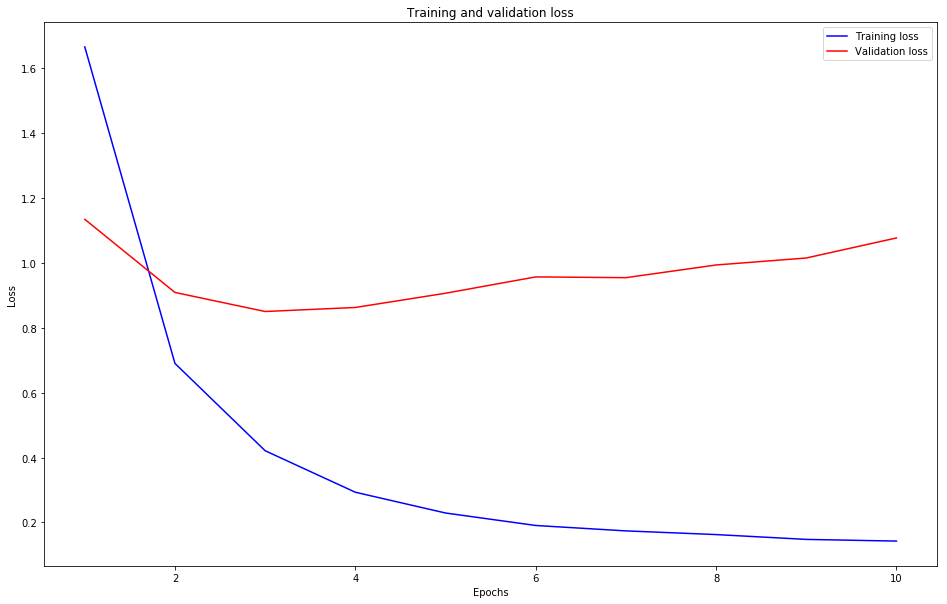

In [20]:
list_epochs = range(1, num_epochs+1)
plt.figure(figsize=(16, 10))
plt.plot(
    list_epochs,
    model_1_history.history['loss'],
    'b',
    label='Training loss'
)
plt.plot(
    list_epochs,
    model_1_history.history['val_loss'],
    'r',
    label='Validation loss'
)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



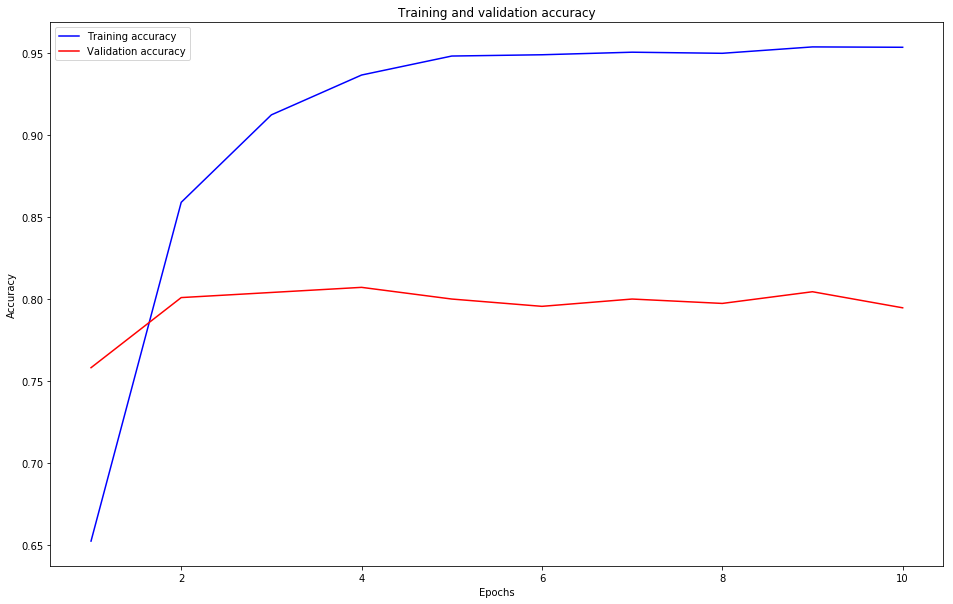

In [21]:
plt.figure(figsize=(16, 10))
plt.plot(
    list_epochs,
    model_1_history.history['acc'],
    'b',
    label='Training accuracy'
)
plt.plot(
    list_epochs,
    model_1_history.history['val_acc'],
    'r',
    label='Validation accuracy'
)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


  ## Model with smaller layers

In [22]:
first_layer_size = 100
model_2 = models.Sequential()
model_2 = models.Sequential()
model_2.add(layers.Dense(
    first_layer_size,
    activation='relu',
    input_shape=(input_size,)
))
model_2.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))



In [23]:
model_compile(model_2)
model_2_history = model_fit(model_2)
model_2_score = model_evaluate(model_2)



Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 3s 291us/step - loss: 2.2265 - acc: 0.6031 - val_loss: 1.5423 - val_acc: 0.7039
Epoch 2/10
8982/8982 [==============================] - 2s 210us/step - loss: 1.1713 - acc: 0.7662 - val_loss: 1.1950 - val_acc: 0.7507
Epoch 3/10
8982/8982 [==============================] - 2s 183us/step - loss: 0.8317 - acc: 0.8333 - val_loss: 1.0456 - val_acc: 0.7778
Epoch 4/10
8982/8982 [==============================] - 2s 189us/step - loss: 0.6257 - acc: 0.8779 - val_loss: 0.9581 - val_acc: 0.7867
Epoch 5/10
8982/8982 [==============================] - 2s 221us/step - loss: 0.4839 - acc: 0.9026 - val_loss: 0.9089 - val_acc: 0.8023
Epoch 6/10
8982/8982 [==============================] - 2s 216us/step - loss: 0.3838 - acc: 0.9217 - val_loss: 0.8660 - val_acc: 0.8059
Epoch 7/10
8982/8982 [==============================] - 2s 205us/step - loss: 0.3088 - acc: 0.9360 - val_loss: 0.8616 - val_acc: 0.8068


In [24]:
print_score(model_1_score, idx=1)



Model 1
Accuracy: 79.47%
Test loss: 1.0766477228166371
Test accuracy 0.794746215494212


In [25]:
print_score(model_2_score, idx=2)


Model 2
Accuracy: 80.68%
Test loss: 0.8890154072989976
Test accuracy 0.8067675868210151


  ### Differences
  For smaller layers the accuracy rised just a little, but the loss rate got much better.
  Model 1 reaches low training loss, but overfits sooner.

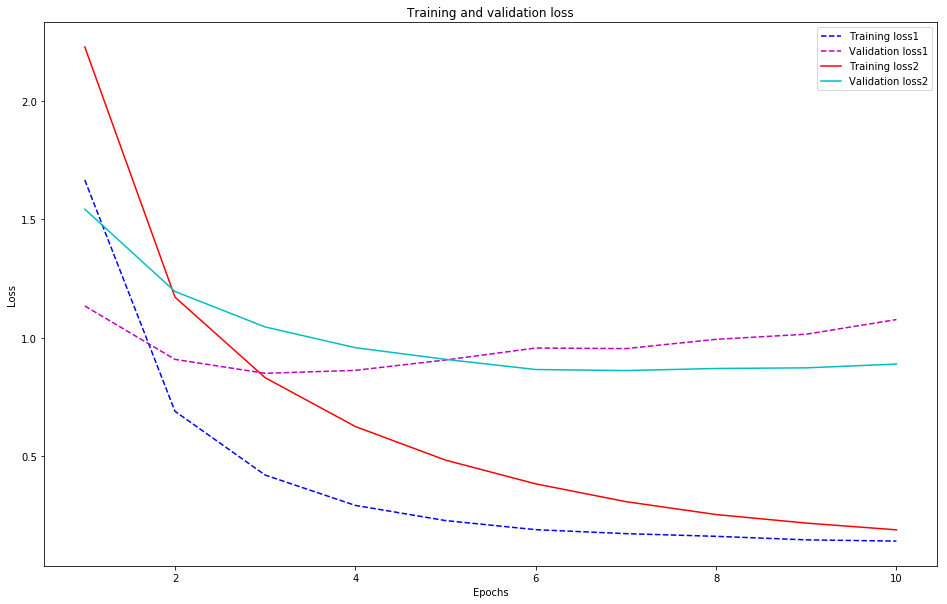

In [26]:
list_epochs = range(1, num_epochs+1)
plt.figure(figsize=(16, 10))
plt.plot(
    list_epochs,
    model_1_history.history['loss'],
    'b--',
    label='Training loss1'
)
plt.plot(
    list_epochs,
    model_1_history.history['val_loss'],
    'm--',
    label='Validation loss1'
)
plt.plot(
    list_epochs,
    model_2_history.history['loss'],
    'r-',
    label='Training loss2'
)
plt.plot(
    list_epochs,
    model_2_history.history['val_loss'],
    'c-',
    label='Validation loss2'
)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


  ## Model with dropout

In [28]:
model_3 = models.Sequential()
model_3.add(layers.Dense(
    first_layer_size,
    activation='relu',
    input_shape=(input_size,)
))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))



In [29]:
model_compile(model_3)
model_3_history = model_fit(model_3)
model_3_score = model_evaluate(model_3)


Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 217us/step - loss: 2.4844 - acc: 0.5595 - val_loss: 1.6637 - val_acc: 0.6803
Epoch 2/10
8982/8982 [==============================] - 2s 229us/step - loss: 1.4477 - acc: 0.7044 - val_loss: 1.2911 - val_acc: 0.7168
Epoch 3/10
8982/8982 [==============================] - 2s 235us/step - loss: 1.1138 - acc: 0.7632 - val_loss: 1.1317 - val_acc: 0.7516
Epoch 4/10
8982/8982 [==============================] - 2s 222us/step - loss: 0.9263 - acc: 0.8003 - val_loss: 1.0388 - val_acc: 0.7711
Epoch 5/10
8982/8982 [==============================] - 2s 221us/step - loss: 0.7849 - acc: 0.8346 - val_loss: 0.9761 - val_acc: 0.7783
Epoch 6/10
8982/8982 [==============================] - 2s 196us/step - loss: 0.6852 - acc: 0.8527 - val_loss: 0.9299 - val_acc: 0.7912
Epoch 7/10
8982/8982 [==============================] - 1s 143us/step - loss: 0.5949 - acc: 0.8761 - val_loss: 0.8916 - val_acc: 0.7983


In [30]:
print_score(model_2_score, idx=2)


Model 2
Accuracy: 80.68%
Test loss: 0.8890154072989976
Test accuracy 0.8067675868210151


In [31]:
print_score(model_3_score, idx=3)


Model 3
Accuracy: 80.41%
Test loss: 0.8552509988935951
Test accuracy 0.8040961710236907


  ### Differences
  Model with dropout has:
  - better validation loss
  - bigger training loss


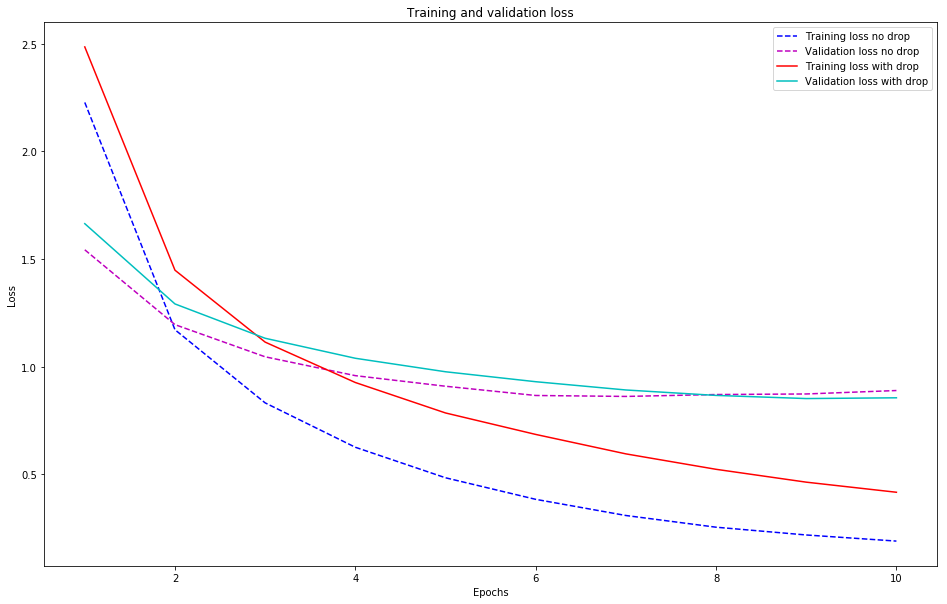

In [32]:
list_epochs = range(1, num_epochs+1)
plt.figure(figsize=(16, 10))
plt.plot(
    list_epochs,
    model_2_history.history['loss'],
    'b--',
    label='Training loss no drop'
)
plt.plot(
    list_epochs,
    model_2_history.history['val_loss'],
    'm--',
    label='Validation loss no drop'
)
plt.plot(
    list_epochs,
    model_3_history.history['loss'],
    'r-',
    label='Training loss with drop'
)
plt.plot(
    list_epochs,
    model_3_history.history['val_loss'],
    'c-',
    label='Validation loss with drop'
)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


  ## Model with L2 regularization

In [33]:
model_4 = models.Sequential()
model_4.add(layers.Dense(
    first_layer_size,
    kernel_regularizer=regularizers.l2(0.01),
    activation='relu',
    input_shape=(input_size,)
))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))



In [34]:
model_compile(model_4)
model_4_history = model_fit(model_4)
model_4_score = model_evaluate(model_4)



Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 221us/step - loss: 3.1428 - acc: 0.5404 - val_loss: 2.0172 - val_acc: 0.6589
Epoch 2/10
8982/8982 [==============================] - 1s 153us/step - loss: 1.8455 - acc: 0.6743 - val_loss: 1.6672 - val_acc: 0.6986
Epoch 3/10
8982/8982 [==============================] - 1s 160us/step - loss: 1.5882 - acc: 0.7150 - val_loss: 1.5449 - val_acc: 0.7142
Epoch 4/10
8982/8982 [==============================] - 1s 155us/step - loss: 1.4720 - acc: 0.7407 - val_loss: 1.4851 - val_acc: 0.7302
Epoch 5/10
8982/8982 [==============================] - 2s 197us/step - loss: 1.4137 - acc: 0.7483 - val_loss: 1.4462 - val_acc: 0.7427
Epoch 6/10
8982/8982 [==============================] - 2s 233us/step - loss: 1.3557 - acc: 0.7611 - val_loss: 1.4237 - val_acc: 0.7435
Epoch 7/10
8982/8982 [==============================] - 2s 242us/step - loss: 1.3284 - acc: 0.7675 - val_loss: 1.3981 - val_acc: 0.7484


In [35]:
print_score(model_3_score, idx=3)



Model 3
Accuracy: 80.41%
Test loss: 0.8552509988935951
Test accuracy 0.8040961710236907


In [36]:
print_score(model_4_score, idx=5)


Model 5
Accuracy: 74.93%
Test loss: 1.3483759359069307
Test accuracy 0.7493321460639379


  ### Differences
  L1 regularization worsened the model.


  ## Model with L1 regularization

In [37]:
model_5 = models.Sequential()
model_5.add(layers.Dense(
    first_layer_size,
    kernel_regularizer=regularizers.l1(0.01),
    activation='relu',
    input_shape=(input_size,)
))
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))



In [38]:
model_compile(model_5)
model_5_history = model_fit(model_5)
model_5_score = model_evaluate(model_5)



Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 230us/step - loss: 38.2410 - acc: 0.3960 - val_loss: 8.2322 - val_acc: 0.5000
Epoch 2/10
8982/8982 [==============================] - 1s 166us/step - loss: 7.9792 - acc: 0.4509 - val_loss: 7.6074 - val_acc: 0.5120
Epoch 3/10
8982/8982 [==============================] - 1s 153us/step - loss: 7.6181 - acc: 0.4685 - val_loss: 7.4310 - val_acc: 0.5156
Epoch 4/10
8982/8982 [==============================] - 1s 148us/step - loss: 7.4756 - acc: 0.4719 - val_loss: 7.3307 - val_acc: 0.5071
Epoch 5/10
8982/8982 [==============================] - 1s 150us/step - loss: 7.3861 - acc: 0.4775 - val_loss: 7.2556 - val_acc: 0.5160
Epoch 6/10
8982/8982 [==============================] - 1s 150us/step - loss: 7.2700 - acc: 0.4839 - val_loss: 7.0887 - val_acc: 0.5147
Epoch 7/10
8982/8982 [==============================] - 1s 149us/step - loss: 7.1181 - acc: 0.4886 - val_loss: 7.0159 - val_acc: 0.5156

In [39]:
print_score(model_3_score, idx=3)



Model 3
Accuracy: 80.41%
Test loss: 0.8552509988935951
Test accuracy 0.8040961710236907


In [40]:
print_score(model_5_score, idx=5)


Model 5
Accuracy: 51.38%
Test loss: 6.949668430793742
Test accuracy 0.5138023152536085


  ### Differences
  Model with L1 regularization got much more worse than with only L2.


  ## Model with L1 and L2 regularizations

In [41]:
model_6 = models.Sequential()
model_6.add(layers.Dense(
    first_layer_size,
    kernel_regularizer=regularizers.l1(0.01),
    activation='relu',
    input_shape=(input_size,)
))
model_6.add(layers.Dropout(0.5))
model_6.add(layers.Dense(
    first_layer_size,
    kernel_regularizer=regularizers.l2(0.01),
    activation='relu',
    input_shape=(input_size,)
))
model_6.add(layers.Dropout(0.5))
model_6.add(layers.Dense(
    last_layer_size,
    activation='softmax'
))



In [42]:
model_compile(model_6)
model_6_history = model_fit(model_6)
model_6_score = model_evaluate(model_6)



Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 2s 253us/step - loss: 39.1727 - acc: 0.3031 - val_loss: 8.7207 - val_acc: 0.4791
Epoch 2/10
8982/8982 [==============================] - 1s 151us/step - loss: 8.4581 - acc: 0.4247 - val_loss: 7.9041 - val_acc: 0.5085
Epoch 3/10
8982/8982 [==============================] - 1s 153us/step - loss: 7.9548 - acc: 0.4551 - val_loss: 7.6750 - val_acc: 0.5093
Epoch 4/10
8982/8982 [==============================] - 1s 164us/step - loss: 7.7160 - acc: 0.4683 - val_loss: 7.4896 - val_acc: 0.5196
Epoch 5/10
8982/8982 [==============================] - 1s 153us/step - loss: 7.5428 - acc: 0.4836 - val_loss: 7.3750 - val_acc: 0.5174
Epoch 6/10
8982/8982 [==============================] - 1s 152us/step - loss: 7.3665 - acc: 0.4860 - val_loss: 7.1026 - val_acc: 0.5191
Epoch 7/10
8982/8982 [==============================] - 1s 142us/step - loss: 7.1671 - acc: 0.4935 - val_loss: 7.0228 - val_acc: 0.5187

In [43]:
print_score(model_3_score, idx=3)



Model 3
Accuracy: 80.41%
Test loss: 0.8552509988935951
Test accuracy 0.8040961710236907


In [44]:
print_score(model_6_score, idx=6)


Model 6
Accuracy: 51.87%
Test loss: 6.920029696670899
Test accuracy 0.5186999109793431


 ### Differences
 Applying both L1 and L2 regularizations also worsened the model results.


 ## Conclusion
 The best results were achieved with Model 3, which is the one with small layers and dropout applied.
